Use timing analysis to compare Bubblesort, InsertionSort, Selectionsort, Shellsort, Mergesort, Quicksort.

This will require lists larger than 500 to get good timings.

Extra Credit (10 points): Provide meaningful plots of these results using Matplotlib.



In [60]:
%matplotlib inline
#%matplotlib notebook

import matplotlib
from IPython.display import set_matplotlib_formats
import timeit
import random
import numpy as np
from scipy import stats

# High-resolution computer screens benefit from this
matplotlib.rcParams['figure.dpi'] = 150
set_matplotlib_formats('retina')

In [61]:
#from random import choices
#nums = choices(range(20000), k=10000)


import numpy as np

nums = np.random.randint(0,20000,size=10000)

print("len(nums): ", len(nums))

len(nums):  10000


In [62]:
#implementing Bubblesort  (should I include short bubble sort too?)
def bubble_sort(alist):
    # for every element (arranged backwards)
    for passnum in range(len(alist) - 1, 0, -1):
        for i in range(passnum):
            #if we come to a point to switch
            if alist[i] > alist[i+1]:
                alist[i], alist[i+1] = alist[i+1], alist[i]

Testing the timing of the Bubble sort

In [63]:
%%time
# Unsorted values
bubble_sort(nums.copy())

CPU times: user 48 s, sys: 113 ms, total: 48.1 s
Wall time: 53.2 s


In [64]:
#implementing Insertion Sort 
def insertion_sort(alist):
    
    for index in range(1,len(alist)):
        currentvalue = alist[index]
        position = index

        while position>0 and alist[position-1]>currentvalue:
            alist[position]=alist[position-1]
            position = position-1

        alist[position]=currentvalue

Testing the timing of the insertion sort

In [65]:
%%time
insertion_sort(nums.copy())

CPU times: user 20.3 s, sys: 33.1 ms, total: 20.3 s
Wall time: 21.3 s


In [66]:
#implementing selection sort
def selection_sort(alist):
    # for every slot in array
    for fillslot in range(len(alist) - 1, 0, -1):
        position_of_max = 0
        #for every set of 0 to fillslot+1
        for location in range(1, fillslot+1):
            # set maximum's location
            if alist[location] > alist[position_of_max]:
                position_of_max = location
        alist[fillslot], alist[position_of_max] = \
            alist[position_of_max], alist[fillslot]

Testing the timing of the selection sort

In [67]:
%%time
selection_sort(nums.copy())

CPU times: user 23 s, sys: 29.7 ms, total: 23 s
Wall time: 24.4 s


In [68]:
#implementing Shellsort
def shell_sort(alist):
    sublistcount = len(alist)//2
    #while we still have sub lists
    print("Initial sublistcount:", sublistcount)
    while sublistcount > 0:
        for startposition in range(sublistcount):
            #use a gap insertion
            gap_insertion_sort(alist, startposition, sublistcount)
        sublistcount = sublistcount//2
        
        
def gap_insertion_sort(alist, start, gap):
    for i in range(start+gap, len(alist), gap):
        currentvalue = alist[i]
        position = i
        #using the gap
        while position >= gap and alist[position-gap] > currentvalue:
            alist[position] = alist[position-gap]
            position = position-gap
        # set current value    
        alist[position] = currentvalue

Testing the timing of shellsort

In [69]:
%%time
shell_sort(nums.copy())

Initial sublistcount: 5000
CPU times: user 248 ms, sys: 2.68 ms, total: 251 ms
Wall time: 284 ms


In [70]:
#implementing merge sort
    
def merge_sort(alist):

    if len(alist) > 1:
        mid = len(alist)//2
        lefthalf = alist[:mid]
        righthalf = alist[mid:]
        
        merge_sort(lefthalf)
        merge_sort(righthalf)
        
        i = 0
        j = 0
        k = 0
        
        while i < len(lefthalf) and j < len(righthalf):
            if lefthalf[i] < righthalf[j]:
                alist[k] = lefthalf[i]
                i = i+1
            else:
                alist[k] = righthalf[j]
                j = j+1
                
            k = k+1
            
        while i < len(lefthalf):
            alist[k] = lefthalf[i]
            i = i + 1
            k = k + 1
            
        while j < len(righthalf):
            alist[k] = righthalf[j]
            j = j + 1
            k = k + 1
        #print("Merging ", alist)

Testing the timing of merge sort

In [71]:
%%time
merge_sort(nums.copy())

CPU times: user 185 ms, sys: 1.15 ms, total: 187 ms
Wall time: 189 ms


In [72]:
#Implementing Quicksort
def quick_sort(alist):
    quick_sort_helper(alist, 0, len(alist) - 1)
    
def quick_sort_helper(alist, first, last):
    if first < last:
        splitpoint = partition(alist, first, last)
        
        quick_sort_helper(alist, first, splitpoint-1)
        quick_sort_helper(alist, splitpoint+1, last)
        
def partition(alist, first, last):
    pivotvalue = alist[first]
    leftmark = first+1
    rightmark = last
    done = False
    
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1
            
        while rightmark >= leftmark and alist[rightmark] >= pivotvalue:
            rightmark = rightmark - 1
            
        if rightmark < leftmark:
            done = True
        else:
            alist[leftmark], alist[rightmark] = \
                alist[rightmark], alist[leftmark]
                
    alist[first], alist[rightmark] = alist[rightmark], alist[first]
    return rightmark  # splitpoint

In [73]:
%%time 
quick_sort(nums.copy())

CPU times: user 118 ms, sys: 1.03 ms, total: 119 ms
Wall time: 125 ms


Experimental Testing: 
we set up a timing test of Bubblesort, InsertionSort, Selectionsort, Shellsort, Mergesort, Quicksort to compare between them, we took a list of numbers sized start from 0 and ending at 600.

In [74]:
nums = np.random.randint(0,20000,size=10000)

t_b = timeit.Timer("bubble_sort(nums.copy())", "from __main__ import bubble_sort,nums")
print("bubble_sort ",t_b.timeit(number=1), "milliseconds")
t_i = timeit.Timer("insertion_sort(nums.copy())", "from __main__ import insertion_sort,nums")
print("insertion_sort ",t_i.timeit(number=1), "milliseconds")
t_s = timeit.Timer("selection_sort(nums.copy())", "from __main__ import selection_sort,nums")
print("selection_sort ",t_s.timeit(number=1), "milliseconds")
t_sh = timeit.Timer("shell_sort(nums.copy())", "from __main__ import shell_sort,nums")
print("shell_sort ",t_sh.timeit(number=1), "milliseconds")
t_m = timeit.Timer("merge_sort(nums.copy())", "from __main__ import merge_sort,nums")
print("merge_sort ",t_m.timeit(number=1), "milliseconds")
t_q = timeit.Timer("quick_sort(nums.copy())", "from __main__ import quick_sort,nums")
print("quick_sort ",t_q.timeit(number=1), "milliseconds")


bubble_sort  53.643151164999836 milliseconds
insertion_sort  20.882637405000423 milliseconds
selection_sort  23.04038460800075 milliseconds
Initial sublistcount: 5000
shell_sort  0.246416556999975 milliseconds
merge_sort  0.1915269269993587 milliseconds
quick_sort  0.11880124899926159 milliseconds


In [75]:
results = {"Bubble_Sort": t_b.timeit(number=1), "Insertion_Sort":t_i.timeit(number=1),
           "Selection_Sort":t_s.timeit(number=1),"Shell_Sort":t_sh.timeit(number=1),
           "Merge_Sort":t_m.timeit(number=1),"Quick_Sort":t_q.timeit(number=1)}

Initial sublistcount: 5000


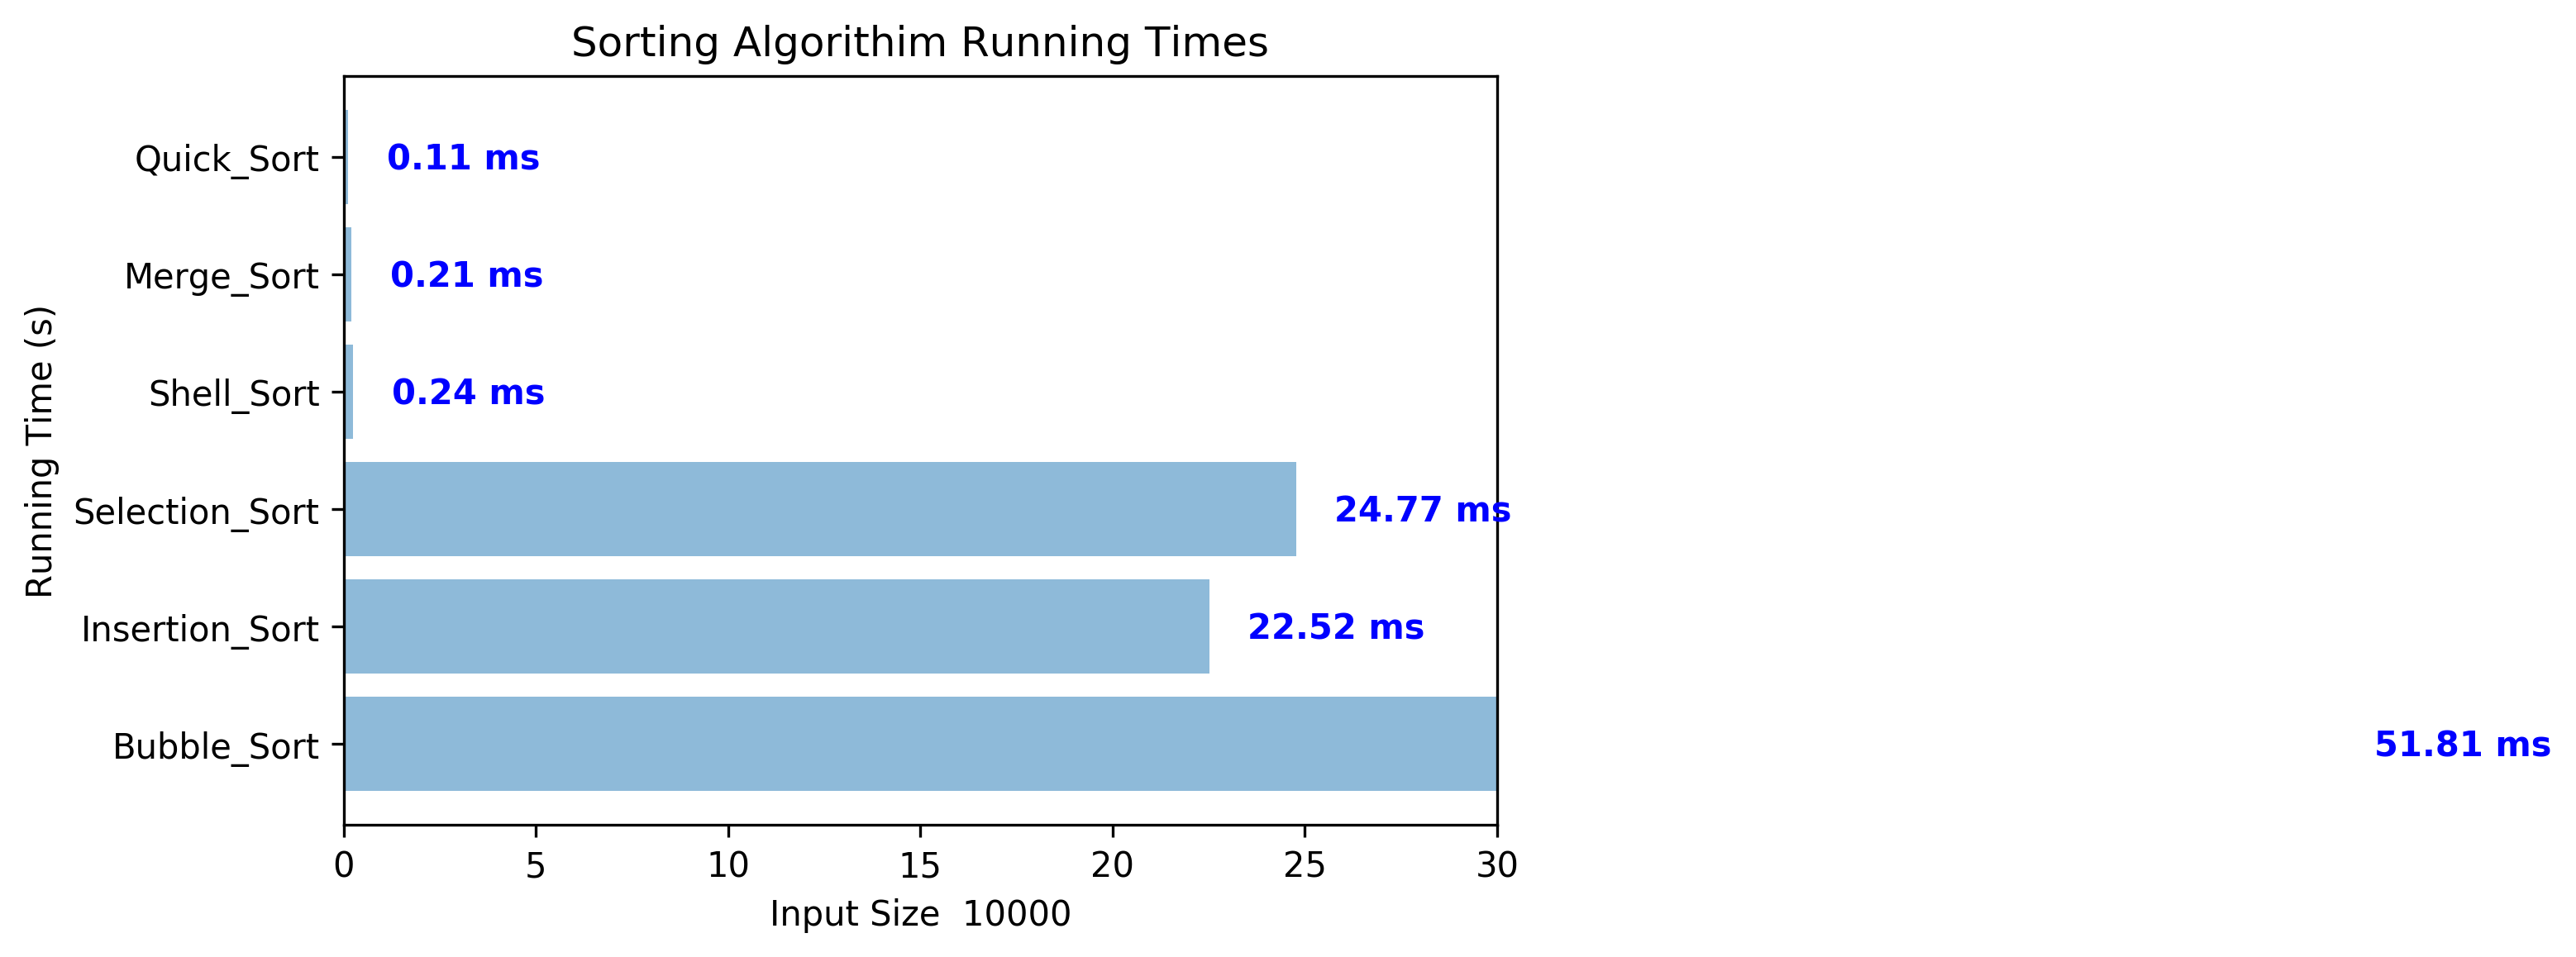

In [76]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()   
y = results.keys()
x = results.values()
y_pos = np.arange(len(y))
plt.barh(y_pos, x, align='center', alpha=0.5)
plt.yticks(y_pos, y)
ax.set_xlim([0,30])
plt.xlabel('Input Size  10000')
plt.ylabel("Running Time (s)")
plt.title('Sorting Algorithim Running Times')

for i, v in enumerate(results.values()):
    ax.text(v + 1, i + -0.1, str(np.round(v,2))+" ms", color='blue', fontweight='bold')
plt.show()

1- A bubble sort, a selection sort, and an insertion sort are O(n^2) algorithms.
2- A shell sort improves on the insertion sort by sorting incremental sublists. It falls between O(n) and O(n^2).
3- A merge sort is O(nlogn), but requires additional space for the merging process.
4- A quick sort is O(nlogn), but may degrade to O(n^2) if the split points are not near the middle of the list. It does not require additional space.


The positive aspect of this program that it has been used two timing methods first, the magic cell in Jupyter (%%time) and second, the timeit Timer. We've showed clearly by graph the difference and the comparison between all these sorting methods and which is faster and which is slower. From our last experience the order of the sorting methods from worst to best are bubble, selection, insertion, shell, merge, quick. 